In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys

if '..' not in sys.path:
    sys.path.append('..')

from data import OneBall2DFreeFallPredictionFromInitialStateWithDiameterDataset

import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.nn.functional import mse_loss as mse_pytorch

import reservoirpy as rpy
from reservoirpy.observables import mse as mse_esn

from itertools import product
from tqdm.notebook import tqdm_notebook

from models import VanilaRNN, GRU, LSTM, ESN, SeqESN, ParallelESN, GroupedESN

rpy.verbosity(0)

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
batch_size = 32

without_relu_losses = []
with_relu_losses = []

for _ in range(80):
    train_data, test_data = OneBall2DFreeFallPredictionFromInitialStateWithDiameterDataset.train_test_split('../data/raw/single-ball-2d-free-fall-initial-with-diameter-relu-test', max_actions=2000, test_frac=0.2)

    train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size)
    test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size)

    esn_relu = ESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01)
    loss = ESN.calculate_loss(esn_relu, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=False)
    with_relu_losses.append(loss)

    esn_no_relu = ESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01)
    loss = ESN.calculate_loss(esn_no_relu, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=False)
    without_relu_losses.append(loss)

Test size:  222
train_test_split response: test fraction rounded to 0.1998199819981998 (222 simulations)
'Model-0': Model('Reservoir-0', 'Ridge-0')
Test loss:  0.04571044354088794
'Model-1': Model('Reservoir-1', 'Ridge-1')
Test loss:  0.057785456450637165
Test size:  222
train_test_split response: test fraction rounded to 0.1998199819981998 (222 simulations)
'Model-2': Model('Reservoir-2', 'Ridge-2')
Test loss:  0.0514590183789709
'Model-3': Model('Reservoir-3', 'Ridge-3')
Test loss:  0.040344896188601286
Test size:  222
train_test_split response: test fraction rounded to 0.1998199819981998 (222 simulations)
'Model-4': Model('Reservoir-4', 'Ridge-4')
Test loss:  0.0477844931472221
'Model-5': Model('Reservoir-5', 'Ridge-5')
Test loss:  0.05461327310958303
Test size:  222
train_test_split response: test fraction rounded to 0.1998199819981998 (222 simulations)
'Model-6': Model('Reservoir-6', 'Ridge-6')
Test loss:  0.06834367957062722
'Model-7': Model('Reservoir-7', 'Ridge-7')
Test loss:  

In [4]:
without_relu_losses

[0.057785456450637165,
 0.040344896188601286,
 0.05461327310958303,
 0.07987148639584357,
 0.045726610077991704,
 0.04309582018394215,
 0.04407606518690164,
 0.04853019135669848,
 0.04935032107061188,
 0.06496875105243792,
 0.06079810868810689,
 0.05585480738774058,
 0.17298309396702857,
 0.06654892560360824,
 0.07802408556896635,
 0.048349183052693825,
 0.07644807703063812,
 0.03974909724747689,
 0.05497418707158086,
 0.042422541508632,
 0.043486941066268915,
 0.05128149454253386,
 0.04030166384057898,
 0.05428758532739593,
 0.1115317166240894,
 0.06882258122600816,
 0.03609814201161675,
 0.04050782020667557,
 0.04090608447660328,
 0.05683540482506184,
 0.06608517551068578,
 0.05813886928283797,
 0.036504102326774895,
 0.05486328817721017,
 0.05901719535667262,
 0.06694951267622642,
 0.05311139747815471,
 0.05727347375682669,
 0.061621312424773166,
 0.031128562246843433,
 0.037994570991056506,
 0.06888116524250966,
 0.039676986373591745,
 0.033821429854264506,
 0.06176462695481354,
 0

In [5]:
diff_means, p_val = ttest_ind(with_relu_losses, without_relu_losses)
print(diff_means, p_val)

0.5915578410996633 0.5549921449723427


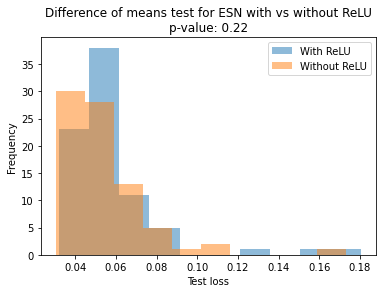

In [6]:
plt.hist(with_relu_losses, label='With ReLU', alpha=0.5, density=False)
plt.hist(without_relu_losses, label='Without ReLU', alpha=0.5, density=False)
plt.title(f'Difference of means test for ESN with vs without ReLU\np-value: {np.round(min(p_val, 1-p_val)/2, 2)}')
plt.xlabel('Test loss')
plt.ylabel('Frequency')
plt.legend()
plt.show()